**CÓDIGO 1: Ecuación de Schrodinger Independiente del Tiempo en 1D, Diferencias Finitas: Pozo Potencial Escalón.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

-Construcción del potencial

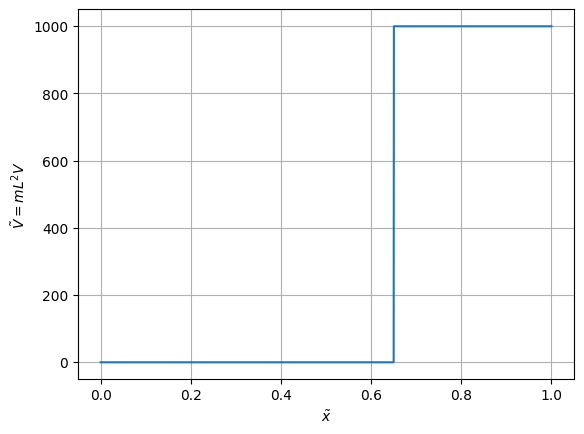

In [ ]:
#Definimos el número de puntos de discretización N y el paso h.

N=2000
h=1/N

#Definimos el vector que discretiza el dominio [0,1]

x=np.linspace(0,1,N+1)

#Definimos el potencial Vtilda=mL^2V 

def Vtilda(x):
    V0 = 10  # Valor fuera del pozo
    return np.where((x >= 0) & (x <= 0.65), 0, V0)


#Graficamos el potencial

V=100*Vtilda(x)
plt.plot(x,V)
plt.xlabel(r'$\tilde{x}$')                    
plt.ylabel(r'$\tilde{V}=mL^2V$')   
plt.grid(True)


-Construcción de la matriz hamiltoniana y cálculo de autovectores y autovalores.

In [7]:
#Definimos la diagonal principal sin incluir el primer y último elemento

d=1/h**2+V[1:-1]

#Definimos la diagonal superior e inferior

e=-1/(2*h**2)*np.ones(len(d)-1)

#Calculamos los autovalores almacenados en  w y los autovectores en v por columnas

w,v=eigh_tridiagonal(d,e) #eigh_tridiagonal permite calcular autovalores y autovectores de una matriz tridiagonal sin necesidad de construirla

-Gráfica de las densidades de probabilidad y funciones de onda

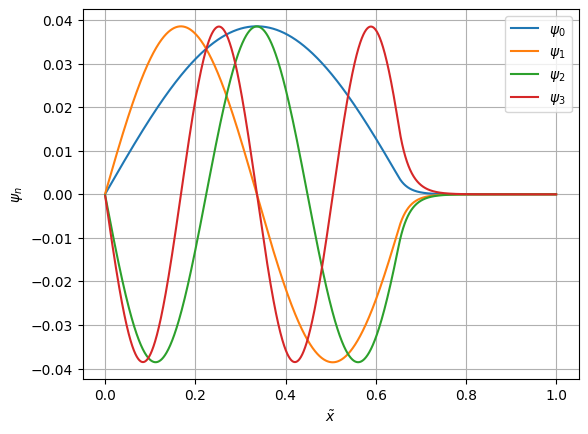

In [8]:
#Mostramos las primeras cuatro autofunciones

plt.plot(x[1:-1],v.T[0],label=r'$\psi_0$')
plt.plot(x[1:-1],v.T[1],label=r'$\psi_1$')
plt.plot(x[1:-1],v.T[2],label=r'$\psi_2$')
plt.plot(x[1:-1],v.T[3],label=r'$\psi_3$')
plt.legend()
plt.xlabel(r'$\tilde{x}$')                    
plt.ylabel(r'$\psi_n$') 
plt.grid(True)

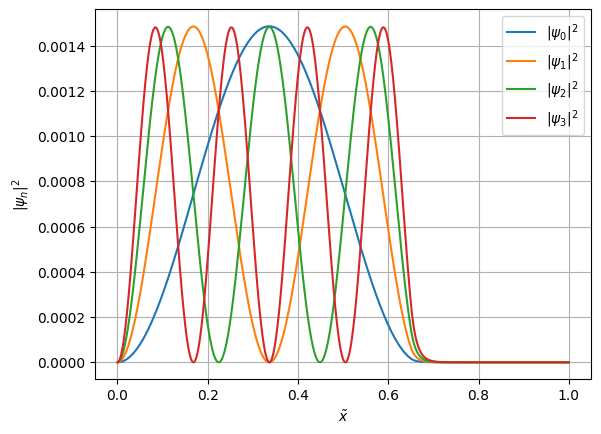

In [9]:
plt.plot(x[1:-1],v.T[0]**2, label=r'$|\psi_0|^2$')
plt.plot(x[1:-1],v.T[1]**2, label=r'$|\psi_1|^2$')
plt.plot(x[1:-1],v.T[2]**2, label=r'$|\psi_2|^2$')
plt.plot(x[1:-1],v.T[3]**2, label=r'$|\psi_3|^2$')
plt.legend(loc='upper right')
plt.xlabel(r'$\tilde{x}$')                    
plt.ylabel(r'$|\psi_n|^2$') 
plt.grid(True)

-Cálculo de los autovalores/energías propias

E_0 = 10.906553
E_1 = 43.609953
E_2 = 98.058987
E_3 = 174.159199
E_4 = 271.755022
E_5 = 390.592310
E_6 = 530.231790
E_7 = 689.803810
E_8 = 866.945250
E_9 = 1029.601478


Text(0, 0.5, '$mL^2E/\\hbar^2$')

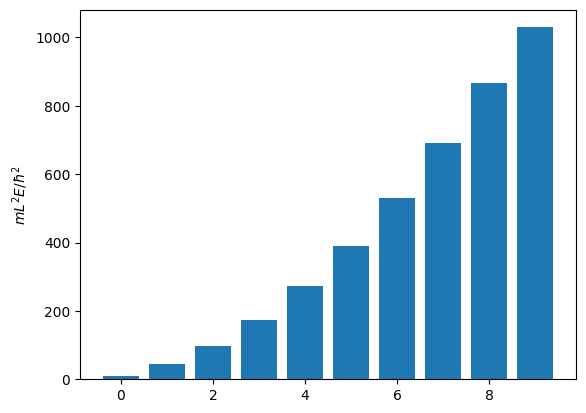

In [10]:
#Mostramos los primeros 10 autovalores
for i in range(10):
    print(f'E_{i} = {w[i]:.6f}')

plt.bar(np.arange(0,10,1),w[0:10])
plt.ylabel(r'$mL^2E/\hbar^2$') #Realmente estamos obteniendo Etilda=mL^2E y se debe dividir por hbar^2 para que tenga sentido dimensionalmente